In [2]:
import os
import cv2
import numpy as np
import pandas as pd
import scipy.io
from PIL import Image
import matplotlib.pyplot as plt

### Reading in data from matlab files with SciPy

In [3]:
meta = scipy.io.loadmat('devkit/cars_meta.mat')
train = scipy.io.loadmat('devkit/cars_train_annos.mat')
test = scipy.io.loadmat('devkit/cars_test_annos_withlabels.mat')

### Creating a function to get the bounds boxes and labels from matlab files

In [4]:
def get_bounds_and_labels(dataset):
    dataset_file_name_list = []
    dataset_image_bounds = []
    dataset_label_name_list = []

    for i in range(dataset['annotations'].shape[1]):
        dataset_file_name_list.append(dataset['annotations'][:,i][0][5][0])
        dataset_label_name_list.append(dataset['annotations'][:,i][0][4][0][0]) 
        
        bounds_list = []
        for j in range(4):
            bounds_list.append(dataset['annotations'][:,i][0][j][0][0])
        dataset_image_bounds.append(bounds_list)
    
    #returns 3 variables to be unpacked 
    return dataset_file_name_list, dataset_label_name_list, dataset_image_bounds

In [5]:
test_files, test_labels, test_bounds = get_bounds_and_labels(test)
train_files, train_labels, train_bounds = get_bounds_and_labels(train)

### Looping over files in both training and testing directory to resize images to bounding box dimensions
### For this project, I utilized a method of combining training and testing images into one directory, then did a validation split of 90/10 for best modeling performance

In [41]:
for i in range(len(train_files)):
    image = cv2.imread(f'cars_train/{train_files[i]}')
    image = image[train_bounds[i][1]:train_bounds[i][3], train_bounds[i][0]:train_bounds[i][2]]
    cv2.imwrite(f'cars_train/{train_files[i]}', image)

In [60]:
for i in range(len(test_files)):
    image = cv2.imread(f'cars_test/{test_files[i]}')
    image = image[test_bounds[i][1]:test_bounds[i][3], test_bounds[i][0]:test_bounds[i][2]]
    cv2.imwrite(f'cars_train/test_{test_files[i]}', image)

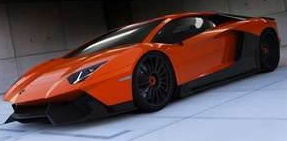

In [9]:
Image.open('cars_train/test_00021.jpg')

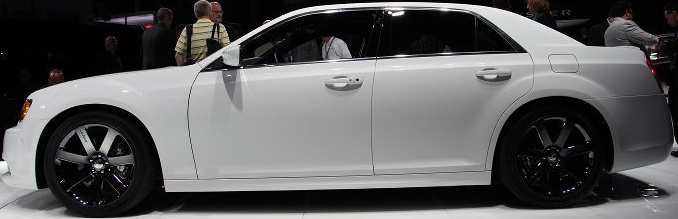

In [8]:
Image.open('cars_train/00021.jpg')